In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [281]:
movie_df = pd.read_csv('movie_statistic_dataset.csv')
movie_df.dropna(inplace=True)


In [282]:
features = movie_df[['runtime_minutes','movie_averageRating','movie_numerOfVotes','Production budget $']]
target = movie_df['Domestic gross $']

In [283]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [284]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 2623511237823736.0
Root Mean Squared Error (RMSE): 51220222.93805188


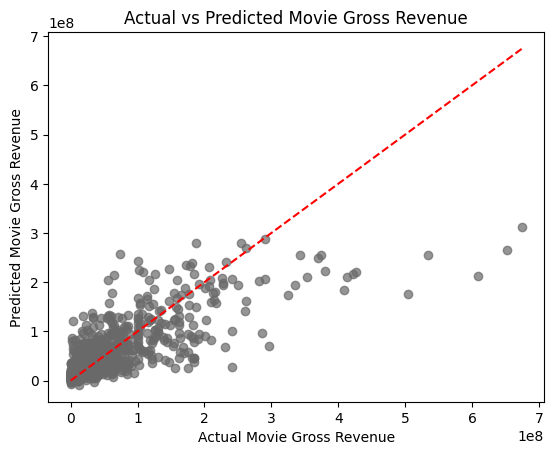

In [285]:

plt.scatter(y_test, y_pred, color='dimgray', alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Movie Gross Revenue')
plt.xlabel('Actual Movie Gross Revenue')
plt.ylabel('Predicted Movie Gross Revenue')
plt.show()

In [ ]:
errors = abs(y_pred - y_test)

errors_df = pd.DataFrame()

errors_df = x_test[['runtime_minutes','movie_averageRating']]
errors_df['Number of Votes'] = x_test['movie_numerOfVotes']/10000
errors_df['Production Budget'] = x_test['Production budget $']/100000000
errors_df['Actual'] = y_test/100000000
errors_df['Predicted'] = y_pred/100000000
errors_df['Difference'] = errors/100000000

errors_df = errors_df.sort_values(by='Difference', ascending=False)
errors_df.reset_index(drop=True).head()